In [244]:
# %pip install ucimlrepo

# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# student_performance = fetch_ucirepo(id=320)

# # data (as pandas dataframes)
# X = student_performance.data.features
# y = student_performance.data.targets

# # metadata
# print(student_performance.metadata)

# # variable information
# print(student_performance.variables)


In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, skewtest, kurtosis, kurtosistest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score



In [246]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [247]:
# data = pd.concat([X, y], axis=1)
# data.head()

In [248]:
# data.to_csv('student_performance.csv')

In [249]:
data = pd.read_csv('student_performance.csv')
data.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  649 non-null    int64 
 1   school      649 non-null    object
 2   sex         649 non-null    object
 3   age         649 non-null    int64 
 4   address     649 non-null    object
 5   famsize     649 non-null    object
 6   Pstatus     649 non-null    object
 7   Medu        649 non-null    int64 
 8   Fedu        649 non-null    int64 
 9   Mjob        649 non-null    object
 10  Fjob        649 non-null    object
 11  reason      649 non-null    object
 12  guardian    649 non-null    object
 13  traveltime  649 non-null    int64 
 14  studytime   649 non-null    int64 
 15  failures    649 non-null    int64 
 16  schoolsup   649 non-null    object
 17  famsup      649 non-null    object
 18  paid        649 non-null    object
 19  activities  649 non-null    object
 20  nursery   

In [251]:
data.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,324.000000,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,187.494444,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,162.000000,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,324.000000,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,486.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,648.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [252]:
data.value_counts().head(20)

Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
648         MS      M    18   R        LE3      T        3     2     services  other     course      mother    3           1          0         no         no      no    no          no       yes     yes       no        4       4         1      3     4     5       4         10  11  11    1
0           GP      F    18   U        GT3      A        4     4     at_home   teacher   course      mother    2           2          0         yes        no      no    no          yes      yes     no        no        4       3         4      1     1     3       4         0   11  11    1
1           GP      F    17   U        GT3      T        1     1     at_home   other     course      father    1           2          0   

In [253]:
data['G1'].value_counts()

G1
10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: count, dtype: int64

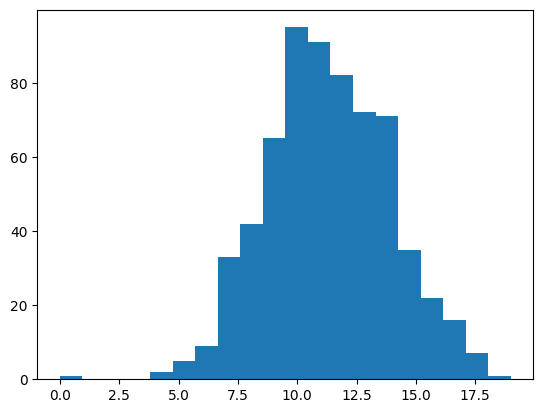

In [254]:
plt.hist(data['G1'], bins=20)
plt.show()

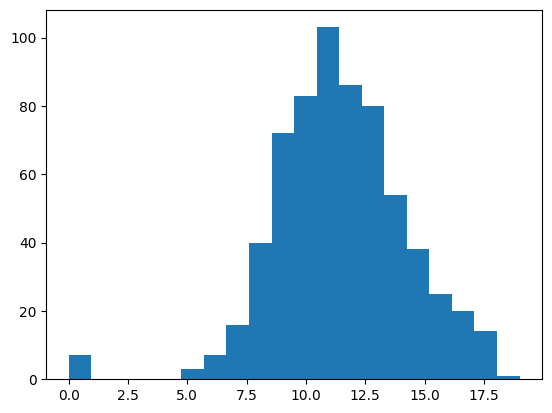

In [255]:
plt.hist(data['G2'], bins=20)
plt.show()

In [256]:
data['G3'].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
8      35
9      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

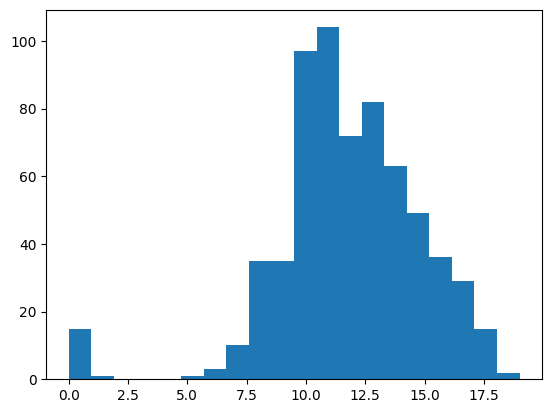

In [257]:
plt.hist(data['G3'], bins=20)
plt.show()

In [258]:
# Skewness

grade = data['G3']
s = skew(grade)
zscore, pvalue = skewtest(grade)

print(f"Skewness: {s:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")


Skewness: -0.911, z-score: -8.282, p-value: 0.000


In [259]:
# Kurtosis

k = kurtosis(grade)
zscore, pvalue = kurtosistest(grade)

print(f"Kurtosis: {k:.3f}, z-score: {zscore:.3f}, p-value: {pvalue:.3f}")


Kurtosis: 2.682, z-score: 6.754, p-value: 0.000


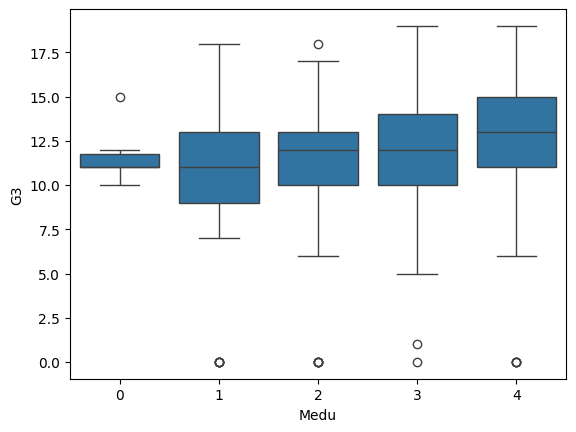

In [260]:
# Mother's education level

sns.boxplot(x='Medu', y='G3', data=data)
plt.show()

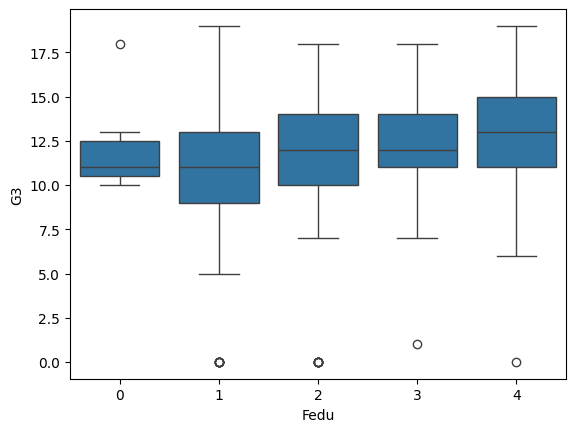

In [261]:
# Father's education level

sns.boxplot(x='Fedu', y='G3', data=data)
plt.show()

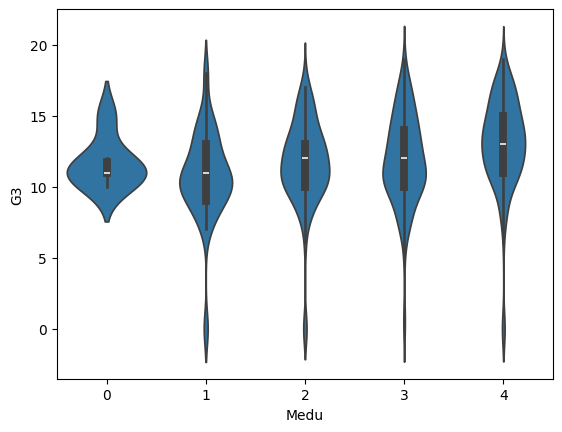

In [262]:
sns.violinplot(x='Medu', y='G3', data=data)
plt.show()

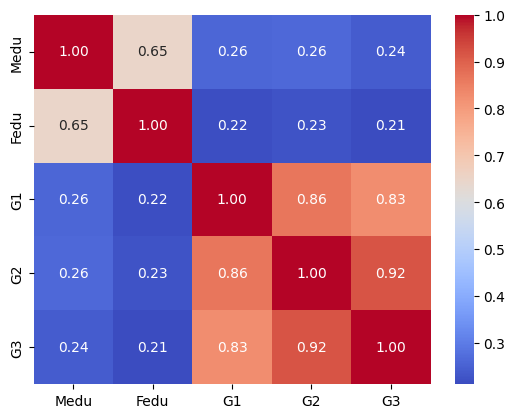

In [ ]:
parents_corr = data[['Medu','Fedu','G1','G2','G3']].corr()

sns.heatmap(parents_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [264]:
data.columns.tolist()

['Unnamed: 0',
 'school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [265]:
data['famsize'].value_counts(normalize=True)

famsize
GT3    0.70416
LE3    0.29584
Name: proportion, dtype: float64

# Modeling

In [266]:
y_n = ['schoolsup',
       'famsup',
       'paid',
       'activities',
       'nursery',
       'higher',
       'internet',
       'romantic']

data[y_n] = data[y_n].applymap(lambda x: 1 if x == 'yes' else 0)

data.value_counts().head(20)

/tmp/ipykernel_599/2912556536.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[y_n] = data[y_n].applymap(lambda x: 1 if x == 'yes' else 0)


Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
648         MS      M    18   R        LE3      T        3     2     services  other     course      mother    3           1          0         0          0       0     0           0        1       1         0         4       4         1      3     4     5       4         10  11  11    1
0           GP      F    18   U        GT3      A        4     4     at_home   teacher   course      mother    2           2          0         1          0       0     0           1        1       0         0         4       3         4      1     1     3       4         0   11  11    1
1           GP      F    17   U        GT3      T        1     1     at_home   other     course      father    1           2          0   

In [267]:
cat_var = data.select_dtypes(include=['object']).columns.tolist()

num_var = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [268]:
# Getting dummy variables for categorical data

cat_data = pd.get_dummies(data[cat_var])

# Resetting cat_var to match dummy variables

cat_var = cat_data.columns.tolist()

cat_var

['school_GP',
 'school_MS',
 'sex_F',
 'sex_M',
 'address_R',
 'address_U',
 'famsize_GT3',
 'famsize_LE3',
 'Pstatus_A',
 'Pstatus_T',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other']

In [269]:
data = pd.concat([data[num_var], cat_data], axis=1)

In [270]:
num_var.remove('G1')
num_var.remove('G2')
num_var.remove('G3')

In [271]:
features = num_var + cat_var
target = 'G3'

In [272]:
X = data[features]
y = data[target]

In [273]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)

In [274]:
# Separating the numerical parts of X for scaling

X_train_num = X_train[num_var]
X_test_num = X_test[num_var]

In [275]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train_num.index, columns=X_train_num.columns)

X_test_scaled = scaler.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test_num.index, columns=X_test_num.columns)

In [276]:
# Reassembling the fully processed X sets

X_train_p = pd.concat([X_train_scaled, X_train[cat_var]], axis=1)
X_test_p = pd.concat([X_test_scaled, X_test[cat_var]], axis=1)

In [277]:
# Initializing and training of the model

model = LinearRegression()
model.fit(X_train_p, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [278]:
# Evaluating Linear Regression

y_pred = model.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 8.057320756131542
Coefficient of determination: 0.17375354494658468


In [279]:
# Initializing and training Lasso model

lasso_model = Lasso(alpha=0.1, max_iter=7000)
lasso_model.fit(X_train_p, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,7000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [280]:
# Evaluating Lasso model

y_pred = lasso_model.predict(X_test_p)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 8.18150439308703
Coefficient of determination: 0.16101900291758198


In [281]:
nonzero_indices = np.nonzero(lasso_model.coef_)

cols = []
for idx in nonzero_indices[0]:
    cols.append(X_train_p.columns.tolist()[idx])

print(cols)

['Medu', 'studytime', 'failures', 'schoolsup', 'higher', 'internet', 'Dalc', 'Walc', 'health', 'school_GP', 'sex_F', 'sex_M', 'reason_other', 'reason_reputation']
